In [102]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

In [103]:
pd.options.display.min_rows=20
df=pd.read_csv('CDNOW_master.txt',names=(['user_id','order_dt','order_products','order_amount']),sep='\s+')
df

,user_id,order_dt,order_products,order_amount
0,1,19970101,1,11.77
1,2,19970112,1,12.00
2,2,19970112,5,77.00
3,3,19970102,2,20.76
4,3,19970330,2,20.76
5,3,19970402,2,19.54
6,3,19971115,5,57.45
7,3,19971125,4,20.96
8,3,19980528,1,16.99
9,4,19970101,2,29.33


In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69659 entries, 0 to 69658
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   user_id         69659 non-null  int64  
 1   order_dt        69659 non-null  int64  
 2   order_products  69659 non-null  int64  
 3   order_amount    69659 non-null  float64
dtypes: float64(1), int64(3)
memory usage: 2.1 MB


In [105]:
df.describe()

,user_id,order_dt,order_products,order_amount
count,69659.000000,6.965900e+04,69659.000000,69659.000000
mean,11470.854592,1.997228e+07,2.410040,35.893648
std,6819.904848,3.837735e+03,2.333924,36.281942
min,1.000000,1.997010e+07,1.000000,0.000000
25%,5506.000000,1.997022e+07,1.000000,14.490000
50%,11410.000000,1.997042e+07,2.000000,25.980000
75%,17273.000000,1.997111e+07,3.000000,43.700000
max,23570.000000,1.998063e+07,99.000000,1286.010000


* 从表中可以看出，大部分订单消费产品数都比较少，平均2.4个，中位数2个，但最大消费产品数有99个，有一定极值干扰  
* 大部分订单消费金额比较稳定，平均消费金额为35.89,中位数为25.98，但最大消费金额为1286.01，有一定极值干扰

In [106]:
df['order_dt']=pd.to_datetime(df.order_dt,format='%Y%m%d')
df['month']=df['order_dt'].values.astype('datetime64[M]')

In [107]:
df

,user_id,order_dt,order_products,order_amount,month
0,1,1997-01-01,1,11.77,1997-01-01
1,2,1997-01-12,1,12.00,1997-01-01
2,2,1997-01-12,5,77.00,1997-01-01
3,3,1997-01-02,2,20.76,1997-01-01
4,3,1997-03-30,2,20.76,1997-03-01
5,3,1997-04-02,2,19.54,1997-04-01
6,3,1997-11-15,5,57.45,1997-11-01
7,3,1997-11-25,4,20.96,1997-11-01
8,3,1998-05-28,1,16.99,1998-05-01
9,4,1997-01-01,2,29.33,1997-01-01


# 1.进行用户消费趋势的分析（按月）
- 每月的消费总金额  
- 每月的消费次数  
- 每月的产品购买量  
- 每月的消费人数

In [108]:
grouped_month=df.groupby('month')

In [109]:
grouped_month.sum().describe()

,user_id,order_products,order_amount
count,1.800000e+01,18.000000,18.000000
mean,4.439157e+07,9326.722222,138906.423889
std,4.376893e+07,6760.373744,103884.935965
min,2.185113e+07,4697.000000,66231.520000
25%,2.458257e+07,5437.250000,78309.920000
50%,3.081133e+07,6846.500000,101755.325000
75%,3.511909e+07,8051.250000,120421.320000
max,1.941418e+08,26159.000000,393155.270000


In [110]:
order_amount_month=grouped_month.sum().order_amount
order_amount_month

month
1997-01-01    299060.17
1997-02-01    379590.03
1997-03-01    393155.27
1997-04-01    142824.49
1997-05-01    107933.30
1997-06-01    108395.87
1997-07-01    122078.88
1997-08-01     88367.69
1997-09-01     81948.80
1997-10-01     89780.77
1997-11-01    115448.64
1997-12-01     95577.35
1998-01-01     76756.78
1998-02-01     77096.96
1998-03-01    108970.15
1998-04-01     66231.52
1998-05-01     70989.66
1998-06-01     76109.30
Name: order_amount, dtype: float64

<AxesSubplot:xlabel='month'>

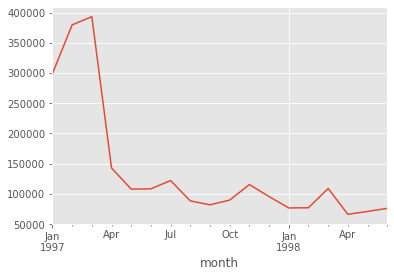

In [111]:
order_amount_month.plot()

- 每月消费金额在前三月达到顶峰，最高达39万多，四月份剧烈下滑，从四月份开始消费金额趋于稳定，并有轻微下滑趋势

In [112]:
order_count=grouped_month.count().user_id
order_count

month
1997-01-01     8928
1997-02-01    11272
1997-03-01    11598
1997-04-01     3781
1997-05-01     2895
1997-06-01     3054
1997-07-01     2942
1997-08-01     2320
1997-09-01     2296
1997-10-01     2562
1997-11-01     2750
1997-12-01     2504
1998-01-01     2032
1998-02-01     2026
1998-03-01     2793
1998-04-01     1878
1998-05-01     1985
1998-06-01     2043
Name: user_id, dtype: int64

<AxesSubplot:xlabel='month'>

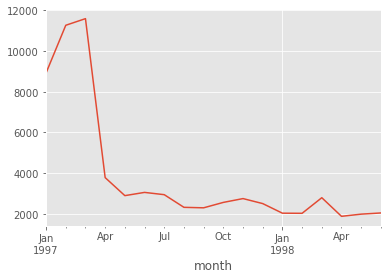

In [113]:
order_count.plot()

- 前三月每月消费订单达到顶峰，最高达11598次，四月份剧烈下滑，从四月份开始消费订单趋于稳定，在2500次左右，并有轻微下滑趋势

In [114]:
order_products_month=grouped_month.sum().order_products
order_products_month

month
1997-01-01    19416
1997-02-01    24921
1997-03-01    26159
1997-04-01     9729
1997-05-01     7275
1997-06-01     7301
1997-07-01     8131
1997-08-01     5851
1997-09-01     5729
1997-10-01     6203
1997-11-01     7812
1997-12-01     6418
1998-01-01     5278
1998-02-01     5340
1998-03-01     7431
1998-04-01     4697
1998-05-01     4903
1998-06-01     5287
Name: order_products, dtype: int64

<AxesSubplot:xlabel='month'>

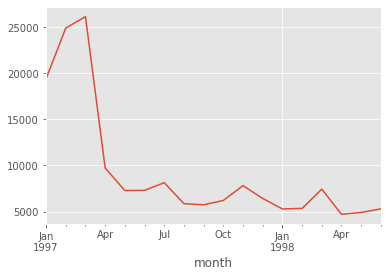

In [115]:
order_products_month.plot()

- 前三月每月消费产品数在20000以上，四月下降到10000左右，后续月份消费产品在10000到5000之间

In [116]:
user_count=grouped_month.user_id.apply(lambda x:len(x.drop_duplicates()))
user_count

month
1997-01-01    7846
1997-02-01    9633
1997-03-01    9524
1997-04-01    2822
1997-05-01    2214
1997-06-01    2339
1997-07-01    2180
1997-08-01    1772
1997-09-01    1739
1997-10-01    1839
1997-11-01    2028
1997-12-01    1864
1998-01-01    1537
1998-02-01    1551
1998-03-01    2060
1998-04-01    1437
1998-05-01    1488
1998-06-01    1506
Name: user_id, dtype: int64

<AxesSubplot:xlabel='month'>

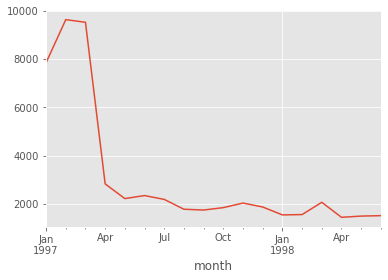

In [117]:
user_count.plot()

- 前三月每月消费人数在8000到10000人左右，到了四月消费人数下降到3781人，之后月份消费人数在2000到4000人之间，慢慢下滑

# 2.用户个体消费分析

- 用户消费金额、消费产品数的描述统计  
- 用户消费金额和消费产品数的散点图  
- 用户消费金额的分布图  
- 用户消费产品数的分布图  
- 用户累计消费金额占比（百分之多少的用户占了百分之多少的消费额）

In [118]:
grouped_user=df.groupby('user_id')

In [119]:
grouped_user.sum().describe()

,order_products,order_amount
count,23570.000000,23570.000000
mean,7.122656,106.080426
std,16.983531,240.925195
min,1.000000,0.000000
25%,1.000000,19.970000
50%,3.000000,43.395000
75%,7.000000,106.475000
max,1033.000000,13990.930000


- 每个消费者平均购买产品数为7.1个，75%的消费者购买产品数在1-7个之间，中位数为3个，最大值为1033个，说明有小部分用户购买了大量的CD  
- 75%的消费者的消费金额在0-106.4元之间，平均消费金额为106元，中位数为43元，有极值干扰

<AxesSubplot:xlabel='order_products', ylabel='order_amount'>

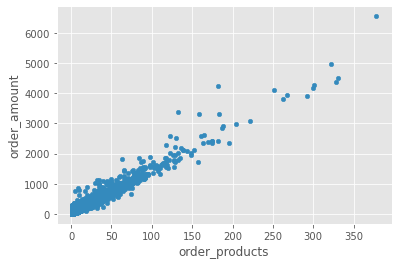

In [120]:
grouped_user.sum().query('order_products<400').plot.scatter(x='order_products',y='order_amount')

- 消费产品数与消费金额呈现一个线性关系，说明这家的产品单价是一个比较稳定的状态

<AxesSubplot:ylabel='Frequency'>

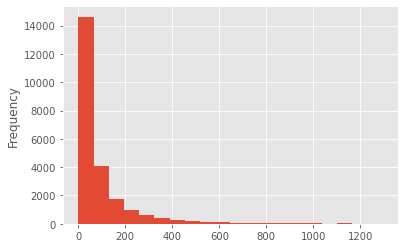

In [121]:
grouped_user.sum().query('order_amount<1300').order_amount.plot.hist(bins=20)

<AxesSubplot:ylabel='Frequency'>

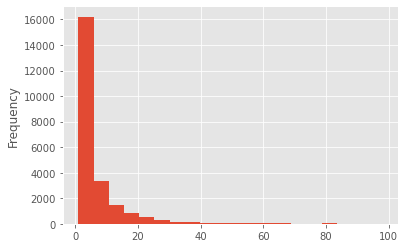

In [122]:
grouped_user.sum().query('order_products<100').order_products.plot.hist(bins=20)

<AxesSubplot:>

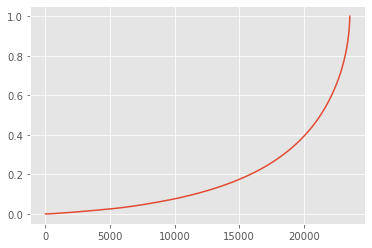

In [123]:
user_cumsum=grouped_user.sum().sort_values('order_amount').apply(lambda x:x.cumsum()/x.sum())  
user_cumsum.reset_index().order_amount.plot()

- 按照用户消费金额进行升序排列，排名前50%的消费者贡献了10%的消费额，排名后20%的消费者贡献了60%的消费额  

# 3.用户消费行为分析  
- 用户第一次消费（首购）  
- 用户最后一次消费  
- 新老客消费比  
    - 多少用户只消费了一次
    - 每月新客占比  
- 用户分层  
    - RFM
    - 新、活跃、回流、流失  
- 用户购买周期（按订单）  
    - 用户消费周期描述
    - 用户消费周期分布
- 用户生命周期（按第一次和最后一次消费）  
    - 用户生命周期描述
    - 用户生命周期分布

<AxesSubplot:>

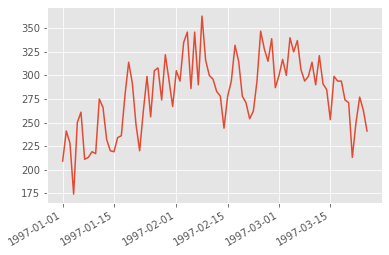

In [124]:
grouped_user.min().order_dt.value_counts().plot()

- 从图中可看出，新增用户集中在前三个月  

<AxesSubplot:>

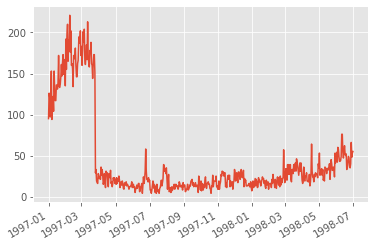

In [125]:
grouped_user.max().order_dt.value_counts().plot()

- 用户最后一次消费比第一次消费时间分布广  
- 大部分用户最后一次消费集中在前三个月，结合上一张图，说明有很多用户只消费了一次  
- 随着时间的递增，用户最后一次消费的人数也在递增，消费呈现流失上升的情况

In [126]:
user_life=grouped_user.order_dt.aggregate(['min','max'])
user_life

,min,max
user_id,,
1,1997-01-01,1997-01-01
2,1997-01-12,1997-01-12
3,1997-01-02,1998-05-28
4,1997-01-01,1997-12-12
5,1997-01-01,1998-01-03
6,1997-01-01,1997-01-01
7,1997-01-01,1998-03-22
8,1997-01-01,1998-03-29
9,1997-01-01,1998-06-08


In [127]:
(user_life['min']==user_life['max']).value_counts()

True     12054
False    11516
dtype: int64

- 大概有一半的用户只消费了一次

In [128]:
rfm=df.pivot_table(index='user_id',values=['order_dt','order_products','order_amount'],
                   aggfunc={'order_dt':'max','order_products':'count','order_amount':'sum'})

In [129]:
rfm

,order_amount,order_dt,order_products
user_id,,,
1,11.77,1997-01-01,1
2,89.00,1997-01-12,2
3,156.46,1998-05-28,6
4,100.50,1997-12-12,4
5,385.61,1998-01-03,11
6,20.99,1997-01-01,1
7,264.67,1998-03-22,3
8,197.66,1998-03-29,8
9,95.85,1998-06-08,3


In [130]:
rfm['r']=(rfm.order_dt.max()-rfm.order_dt)/np.timedelta64(1,'D')

In [131]:
rfm.rename(columns={'order_amount':'m','order_products':'f'},inplace=True)

In [132]:
rfm

,m,order_dt,f,r
user_id,,,,
1,11.77,1997-01-01,1,545.0
2,89.00,1997-01-12,2,534.0
3,156.46,1998-05-28,6,33.0
4,100.50,1997-12-12,4,200.0
5,385.61,1998-01-03,11,178.0
6,20.99,1997-01-01,1,545.0
7,264.67,1998-03-22,3,100.0
8,197.66,1998-03-29,8,93.0
9,95.85,1998-06-08,3,22.0


In [133]:
def func(x):
    level=x.apply(lambda x:'1' if x>=0 else '0')
    label=level.r+level.f+level.m
    d={'111':'重要保持客户',
       '011':'重要价值用户',
       '101':'重要挽留用户',
       '001':'重要发展用户',
       '110':'一般保持用户',
       '010':'一般价值用户',
       '100':'一般挽留用户',
       '000':'一般发展用户'}
    result=d[label]
    return result

In [134]:
rfm['label']=rfm[['r','f','m']].apply(lambda x:x-x.mean()).apply(func,axis=1)

In [135]:
rfm

,m,order_dt,f,r,label
user_id,,,,,
1,11.77,1997-01-01,1,545.0,一般挽留用户
2,89.00,1997-01-12,2,534.0,一般挽留用户
3,156.46,1998-05-28,6,33.0,重要价值用户
4,100.50,1997-12-12,4,200.0,一般价值用户
5,385.61,1998-01-03,11,178.0,重要价值用户
6,20.99,1997-01-01,1,545.0,一般挽留用户
7,264.67,1998-03-22,3,100.0,重要价值用户
8,197.66,1998-03-29,8,93.0,重要价值用户
9,95.85,1998-06-08,3,22.0,一般价值用户


<AxesSubplot:xlabel='f', ylabel='r'>

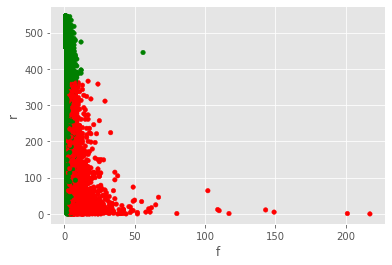

In [143]:
rfm.loc[rfm.label=='重要价值用户','color']='r'
rfm.plot.scatter('f','r',c=rfm.color)

In [148]:
pivoted=df.pivot_table(index='user_id',columns='month',values='order_dt',aggfunc='count',fill_value=0)

In [149]:
pivoted

month,1997-01-01,1997-02-01,1997-03-01,1997-04-01,1997-05-01,1997-06-01,1997-07-01,1997-08-01,1997-09-01,1997-10-01,1997-11-01,1997-12-01,1998-01-01,1998-02-01,1998-03-01,1998-04-01,1998-05-01,1998-06-01
user_id,,,,,,,,,,,,,,,,,,
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,1,1,0,0,0,0,0,0,2,0,0,0,0,0,1,0
4,2,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
5,2,1,0,1,1,1,1,0,1,0,0,2,1,0,0,0,0,0
6,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
8,1,1,0,0,0,1,1,0,0,0,2,1,0,0,1,0,0,0
9,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1


In [186]:
def func(data):
    status=[]
    for i in range(18):
        if data[i]==0:
            if len(status)>0:
                if status[i-1]=='unreg':
                    status.append('unreg')
                else:
                    status.append('unactive')
            else:
                status.append('unreg')
        else:
            if len(status)>0:
                if status[i-1]=='unreg':
                    status.append('new')
                elif status[i-1]=='unactive':
                    status.append('return')
                else:
                    status.append('active')
            else:
                status.append('new')
    data=data.astype('object')
    for i in range(18):
        data[i]=status[i]
    return data

In [190]:
purchase_sta=pivoted.apply(func,axis=1)
purchase_sta

month,1997-01-01,1997-02-01,1997-03-01,1997-04-01,1997-05-01,1997-06-01,1997-07-01,1997-08-01,1997-09-01,1997-10-01,1997-11-01,1997-12-01,1998-01-01,1998-02-01,1998-03-01,1998-04-01,1998-05-01,1998-06-01
user_id,,,,,,,,,,,,,,,,,,
1,new,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive
2,new,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive
3,new,unactive,return,active,unactive,unactive,unactive,unactive,unactive,unactive,return,unactive,unactive,unactive,unactive,unactive,return,unactive
4,new,unactive,unactive,unactive,unactive,unactive,unactive,return,unactive,unactive,unactive,return,unactive,unactive,unactive,unactive,unactive,unactive
5,new,active,unactive,return,active,active,active,unactive,return,unactive,unactive,return,active,unactive,unactive,unactive,unactive,unactive
6,new,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive
7,new,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,return,unactive,unactive,unactive,unactive,return,unactive,unactive,unactive
8,new,active,unactive,unactive,unactive,return,active,unactive,unactive,unactive,return,active,unactive,unactive,return,unactive,unactive,unactive
9,new,unactive,unactive,unactive,return,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,return


In [200]:
pur_sta_cts=purchase_sta.replace('unreg',np.NaN).apply(lambda x:pd.value_counts(x))
pur_sta_cts

month,1997-01-01,1997-02-01,1997-03-01,1997-04-01,1997-05-01,1997-06-01,1997-07-01,1997-08-01,1997-09-01,1997-10-01,1997-11-01,1997-12-01,1998-01-01,1998-02-01,1998-03-01,1998-04-01,1998-05-01,1998-06-01
active,NaN,1157.0,1681,1773.0,852.0,747.0,746.0,604.0,528.0,532.0,624.0,632.0,512.0,472.0,571.0,518.0,459.0,446.0
new,7846.0,8476.0,7248,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
return,NaN,NaN,595,1049.0,1362.0,1592.0,1434.0,1168.0,1211.0,1307.0,1404.0,1232.0,1025.0,1079.0,1489.0,919.0,1029.0,1060.0
unactive,NaN,6689.0,14046,20748.0,21356.0,21231.0,21390.0,21798.0,21831.0,21731.0,21542.0,21706.0,22033.0,22019.0,21510.0,22133.0,22082.0,22064.0


<AxesSubplot:xlabel='month'>

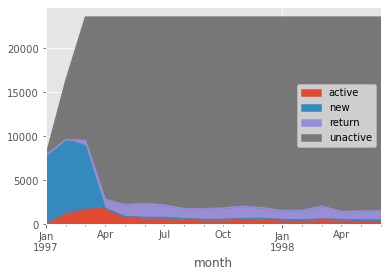

In [202]:
pur_sta_cts.fillna(0).T.plot.area()     

In [214]:
order_diff=grouped_user.apply(lambda x:x.order_dt-x.order_dt.shift())
order_diff

user_id       
1        0            NaT
2        1            NaT
         2         0 days
3        3            NaT
         4        87 days
         5         3 days
         6       227 days
         7        10 days
         8       184 days
4        9            NaT
                   ...   
23564    69649   193 days
23565    69650        NaT
23566    69651        NaT
23567    69652        NaT
23568    69653        NaT
         69654    11 days
         69655    17 days
23569    69656        NaT
23570    69657        NaT
         69658     1 days
Name: order_dt, Length: 69659, dtype: timedelta64[ns]

In [215]:
order_diff.describe()

count                         46089
mean     68 days 23:22:13.567662566
std      91 days 00:47:33.924168893
min                 0 days 00:00:00
25%                10 days 00:00:00
50%                31 days 00:00:00
75%                89 days 00:00:00
max               533 days 00:00:00
Name: order_dt, dtype: object

<AxesSubplot:ylabel='Frequency'>

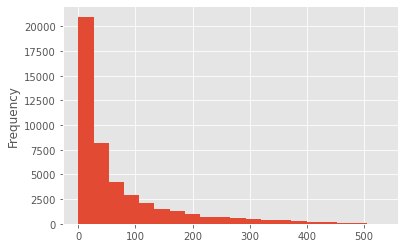

In [219]:
(order_diff/np.timedelta64(1,'D')).plot.hist(bins=20)

In [221]:
(user_life['max']-user_life['min']).describe()

count                          23570
mean     134 days 20:55:36.987696224
std      180 days 13:46:43.039788104
min                  0 days 00:00:00
25%                  0 days 00:00:00
50%                  0 days 00:00:00
75%                294 days 00:00:00
max                544 days 00:00:00
dtype: object

<AxesSubplot:ylabel='Frequency'>

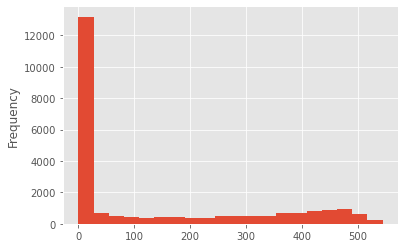

In [223]:
((user_life['max']-user_life['min'])/np.timedelta64(1,'D')).plot.hist(bins=20)

# 4. 复购率和回购率分析  
- 复购率  
    - 自然月内，购买多次的用户占比  
- 回购率  
    - 曾经购买过的用户在某一段时间再次购买的占比

In [226]:
pur_f=pivoted.applymap(lambda x: 1 if x>1 else 0 if x==1 else np.NaN)
pur_f

month,1997-01-01,1997-02-01,1997-03-01,1997-04-01,1997-05-01,1997-06-01,1997-07-01,1997-08-01,1997-09-01,1997-10-01,1997-11-01,1997-12-01,1998-01-01,1998-02-01,1998-03-01,1998-04-01,1998-05-01,1998-06-01
user_id,,,,,,,,,,,,,,,,,,
1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN
4,1.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
5,1.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,0.0,NaN,NaN,1.0,0.0,NaN,NaN,NaN,NaN,NaN
6,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
8,0.0,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,1.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN
9,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0


<AxesSubplot:xlabel='month'>

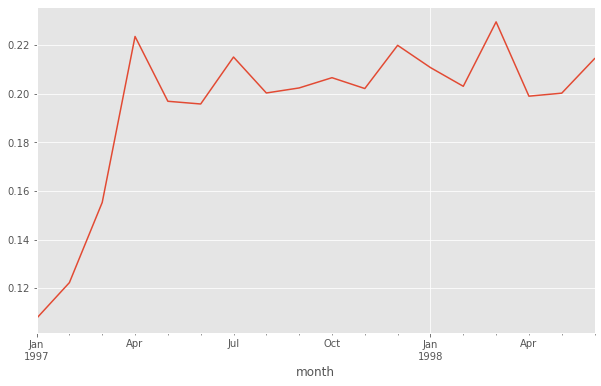

In [229]:
(pur_f.sum()/pur_f.count()).plot(figsize=(10,6))   

In [267]:
def repur(data):
    status=[]
    for i in range(17):
        if data[i]>=1:
            if data[i+1]>=1:
                status.append(1)
            else:   
                status.append(0)
        else:
            status.append(np.NaN)
    status.append(np.NaN)
    data=data.astype('float64')
    for i in range(18):
        data[i]=status[i]
    return data

In [268]:
pur_b=pivoted.apply(repur,axis=1)
pur_b

month,1997-01-01,1997-02-01,1997-03-01,1997-04-01,1997-05-01,1997-06-01,1997-07-01,1997-08-01,1997-09-01,1997-10-01,1997-11-01,1997-12-01,1998-01-01,1998-02-01,1998-03-01,1998-04-01,1998-05-01,1998-06-01
user_id,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.0,NaN,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN
4,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
5,1.0,0.0,NaN,1.0,1.0,1.0,0.0,NaN,0.0,NaN,NaN,1.0,0.0,NaN,NaN,NaN,NaN,NaN
6,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
8,1.0,0.0,NaN,NaN,NaN,1.0,0.0,NaN,NaN,NaN,1.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN
9,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:xlabel='month'>

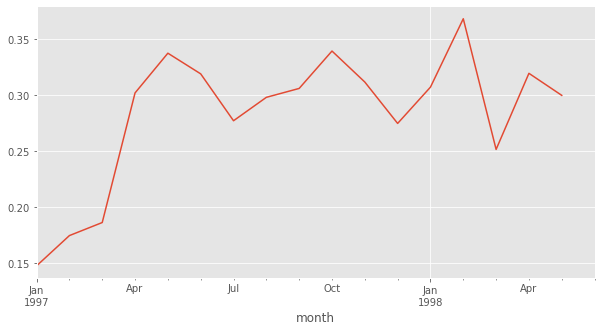

In [269]:
(pur_b.sum()/pur_b.count()).plot(figsize=(10,5))  

In [257]:
pivoted

month,1997-01-01,1997-02-01,1997-03-01,1997-04-01,1997-05-01,1997-06-01,1997-07-01,1997-08-01,1997-09-01,1997-10-01,1997-11-01,1997-12-01,1998-01-01,1998-02-01,1998-03-01,1998-04-01,1998-05-01,1998-06-01
user_id,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,1,1,0,0,0,0,0,0,2,0,0,0,0,0,1,0
4,2,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
5,2,1,0,1,1,1,1,0,1,0,0,2,1,0,0,0,0,0
6,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
8,1,1,0,0,0,1,1,0,0,0,2,1,0,0,1,0,0,0
9,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
